In [ ]:
#@title Instala os pacotes necessários para que seja feita a conexão com o banco de dados do Artia
#instalação dos pacotes necessários para conexão no banco de dados desejado
!pip install mysql-connector-python
!apt install unixodbc-dev
!pip install pyodbc


In [ ]:
#@title Faz a importação de pacotes e bibliotecas necessárias para conexão com o banco de dados, consulta e manipulação dos dados obtidos
#importação de pacotes e bibliotecas necessárias para conexão com o mysql e manipulação dos dados
import mysql.connector 
import pyodbc
import pandas.io.sql as psql


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
from IPython.core.pylabtools import figsize
from google.colab import data_table
from datetime import datetime

data_table.enable_dataframe_formatter()


In [ ]:
#@title Nesta célula é feita a conexão ao banco de dados do Artia, após a conexão é feita uma query para seleção das informações necessárias sobre os projetos, como datas de início e fim, entre outros. cada query se refere às informações relacionadas a um implantador, é possível fazer a busca com apenas uma query, mas ela traz também celúlas relacionadas a implantadores já desligados da empresa e dificulta a visualização dos dados.

cnx = mysql.connector.connect(user='cliente-51026', password='MnsrK6bZRhAuS/D+AZGX16fsV5I=',
                              host='ats.db.artia.com',
                              port=3306,
                              database='artia')

cursor = cnx.cursor()

#BRUNO
sqlBruno = ("""
                    select 
                    prj.name, prj.responsible_user_name,prj.project_status_name, prj.actual_start, prj.activities_estimated_end, prj.actual_end
                    from organization_51026_projects prj
                    where  
                     prj.responsible_user_name = "DTNA-Bruno Souza(ATS)"
                   """)
dfBruno = pd.read_sql_query(sqlBruno, cnx)


#EYDER
sqlEyder = ("""
                    select 
                    prj.name, prj.responsible_user_name,prj.project_status_name, prj.actual_start, prj.activities_estimated_end, prj.actual_end
                    from organization_51026_projects prj
                    where  
                      prj.responsible_user_name = "DTNA-Eyder Silva(ATS)"
                   """)
dfEyder = pd.read_sql_query(sqlEyder, cnx)


#GABRIEL
sqlGabriel = ("""
                    select 
                    prj.name, prj.responsible_user_name,prj.project_status_name, prj.actual_start, prj.activities_estimated_end, prj.actual_end
                    from organization_51026_projects prj
                    where  
                      prj.responsible_user_name = "DTNA-Gabriel Morais(ATS)"
                   """)
dfGabriel = pd.read_sql_query(sqlGabriel, cnx)


#GENILSON
sqlGenilson = ("""
                    select 
                    prj.name, prj.responsible_user_name,prj.project_status_name, prj.actual_start, prj.activities_estimated_end, prj.actual_end
                    from organization_51026_projects prj
                    where  
                      prj.responsible_user_name = "PTZ-Genilson Fernandes(ATS)"
                   """)
dfGenilson = pd.read_sql_query(sqlGenilson, cnx)



In [ ]:
#@title Agrupa os dataframes obtidos na consulta ao banco de dados e renomeia as colunas.
dfDtna = pd.concat([dfBruno, dfEyder, dfGabriel, dfGenilson])
dfDtna.rename(columns={'name': 'Nome Projeto', 'responsible_user_name': 'Responsável Projeto', 'project_status_name': 'Status Projeto', 'actual_start': 'Data Início', 'activities_estimated_end': 'Fim Previsto', 'actual_end': 'Fim Real'}, inplace = True)



In [ ]:
#@title Tabela interativa que permite filtrar os projetos de acordo com o nome do projeto, responsável, status, datas de início e fim. É possível fazer a pesquisa relacionado mais de um campo. A tabela apresenta também o campo "Status Data", no qual é dado se o projeto está atrasado ou não. Quando o campo "Fim Real" não está preenchido, aparece "Atrasado" por não ter conteúdo na linha para que seja feita a comparação. Logo, no caso de buscas por projetos atrasados deve se ter o cuidado de verificar se o campo "Fim Real" está preenchido ou não.
'''
compara as colunas "Fim previsto" e "Fim Real", no intuito de saber se o projeto está 
ou não dentro do prazo estipulado, ao fim da comparação é criada a coluna no dataframe, 
com o nome "Status Data", que é preenchida com "Dentro do Prazo" e "Atrasado"
'''
dfprazo =  dfDtna.loc[dfDtna['Status Projeto'] != 'Em quarentena']
comparacaoPrazo = np.where(dfprazo['Fim Previsto'] >= dfprazo['Fim Real'], 'Dentro do Prazo', 'Atrasado')
dfprazo["Status Data"] = comparacaoPrazo
dfprazo

,Nome Projeto,Responsável Projeto,Status Projeto,Data Início,Fim Previsto,Fim Real,Status Data
0,20. 17996. 14995 - ELO MULTIMARCAS,DTNA-Bruno Souza(ATS),Encerrado,2021-08-30,2021-10-01,2021-09-30,Dentro do Prazo
1,20. 17432 . 15822 - DEPOSITO ALVORADA (new),DTNA-Bruno Souza(ATS),Encerrado,2021-03-02,2022-02-23,2022-02-22,Dentro do Prazo
2,21. 7765 - IRMAOS MOURA COMERCIO LTDA,DTNA-Bruno Souza(ATS),Encerrado,2021-04-27,2021-05-11,2021-05-11,Dentro do Prazo
3,21. 16879 - REAL SHOPPING,DTNA-Bruno Souza(ATS),Encerrado,2021-04-27,2021-05-31,2021-05-31,Dentro do Prazo
4,21. 19229 - COMERCIAL POPULAR (COMÉRCIO DE ALI...,DTNA-Bruno Souza(ATS),Encerrado,2021-04-26,2021-09-27,2021-09-24,Dentro do Prazo
...,...,...,...,...,...,...,...
2,21.16843 - PODIUM DISTRIBUIDORA PETROLINA PE J...,PTZ-Genilson Fernandes(ATS),Em andamento,2022-01-06,2022-01-15,None,Atrasado
3,22.19285 - W MADEIRAS A LOJA DO BOM MARCENEIRO,PTZ-Genilson Fernandes(ATS),Encerrado,2022-01-13,2022-02-03,2022-02-03,Dentro do Prazo
4,22.15385 - MINITA MINERAÇÃO,PTZ-Genilson Fernandes(ATS),Encerrado,2022-01-27,2022-02-03,2022-02-03,Dentro do Prazo
5,22.4600 - AUTO PECAS E MECANICA CELSO (CELSO A...,PTZ-Genilson Fernandes(ATS),Encerrado,2022-02-14,2022-02-28,2022-02-24,Dentro do Prazo


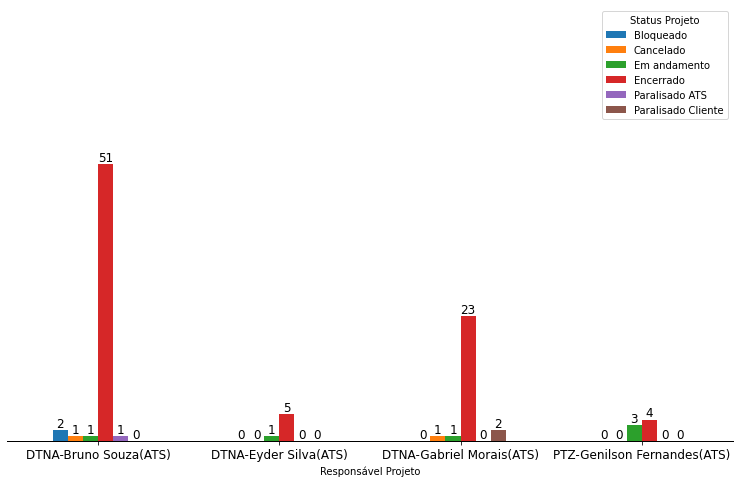

In [ ]:
#@title Gráfico que relaciona os implantadores e seus projetos de acordo com o status dos projetos
#cria um gráfico com os dados da coluna "Status Projeto", contando quantas vezes cada tipo aparece
pd.crosstab(dfprazo['Responsável Projeto'],dfprazo['Status Projeto']).plot.bar()


#formatação dos axis do gráfico
ax = plt.gca()
ax.set_ylabel('')
ax.tick_params(labelsize = 12)
plt.xticks(rotation=360)
plt.gcf().set_size_inches(13, 8)

#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(1)

#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

#remoção dos ticks
ax.tick_params(axis = 'y', labelleft = False, left = None)

#definindo o tamanho da escala de y
ax.set_ylim([0, 80])

#coloca os valores referentes a cada barra em seu topo
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize = 12, color = 'black', ha = 'center', va = 'bottom')

plt.show()